In [1]:
from chatterjee import chatt
from chatterjee import chatt_table
from chatterjee import chatt_pval
import pandas as pd
import math
import random as rnd
from matplotlib import pyplot as plt
import seaborn as sns

The distribution and correlations of COSINE function


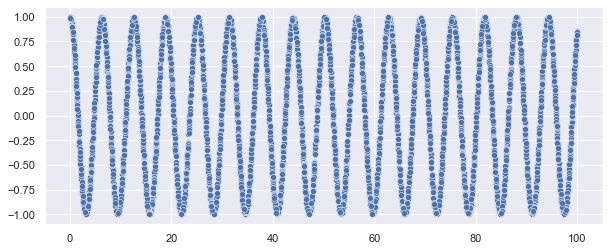

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,-0.010974,-0.013669,-0.009232,0.990502,-0.002876


The distribution and correlations of TANGENT function


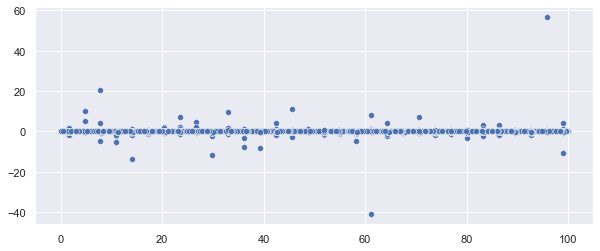

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,0.00277,-0.0173,-0.005389,0.98126,0.000933


The distribution and correlations of LOG function


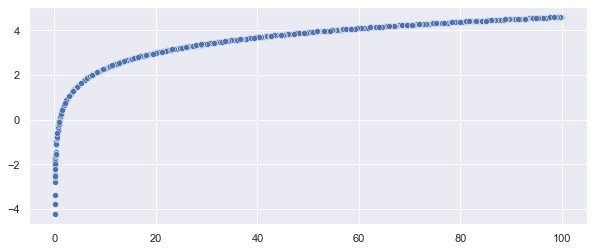

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,0.873455,0.999982,0.997439,0.999655,0.994476


The distribution and correlations of -SQUARE function


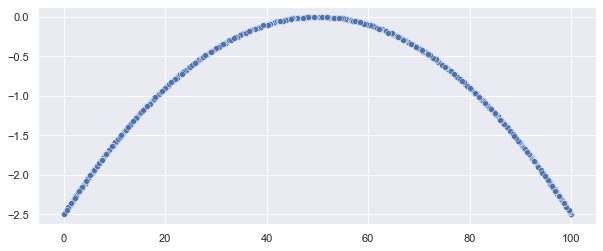

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,-0.014222,-0.02443,-0.023259,0.999323,0.266039


The distribution and correlations of RANDOM function


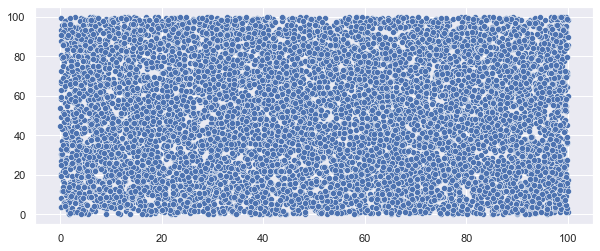

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,-0.016434,-0.016333,-0.010919,-0.004932,-0.000553


In [2]:
# magic happens mainly here

# seed is start of Kazimierz IV Jagiellonczyk reign
rnd.seed = 1447

# make plots bigger
sns.set(rc={'figure.figsize':(10, 4)})

# generate data
X = [round(rnd.uniform(0, 100), 4) for _ in range(10000)]

Y_cos  = [round(math.cos(a), 2) for a in X]
Y_tan  = [round((math.tan(a))/100, 2) for a in X]
Y_log  = [round(math.log(a), 2) for a in X]

Y_sqr  = [round((math.pow(a-50, 2)*(-1))/1000, 2) for a in X]

Y_rnd = [round(rnd.uniform(0, 100), 4) for _ in range(10000)]

# dict to use in for loop
dict_of_Ys = {'COSINE': Y_cos, 'TANGENT': Y_tan, 'LOG': Y_log, 
              '-SQUARE': Y_sqr, 'RANDOM':  Y_rnd}

# it feels like this is not a place to define functions, but 
# I dont know what is
def add_noise(Y, noise_value):
    return [a + rnd.uniform(-noise_value, noise_value) for a in Y]

# ARE YOU READY!?
# MAKE SOME NOOOOIIIISSEEEEE!!!!
noisy_dict_of_Ys = {key: add_noise(value, 0.5) for key, value in dict_of_Ys.items()}

# for noisless version
for key, Y in dict_of_Ys.items():

# for noisy version
# for key, Y in noisy_dict_of_Ys.items():
    
    print(f'The distribution and correlations of {key} function')

    # distribution plot
    sns.scatterplot(x=X, y=Y)
    plt.show()

    # finally calculate them correlations
    dict_pd = {'X': X, 'Y': Y}
    df = pd.DataFrame(dict_pd)

    df_corr_dict = {}

    df_corr_dict['PEARSON'] = [df['X'].corr(df['Y'])]
    df_corr_dict['SPEARMAN'] = [df['X'].corr(df['Y'], method = 'spearman')]
    df_corr_dict['KENDALL'] = [df['X'].corr(df['Y'], method = 'kendall')]

    df_corr_dict['CHATTERJEE1'] = chatt(df['X'], df['Y'])
    df_corr_dict['CHATTERJEE2'] = chatt(df['Y'], df['X'])

    # little DataFrame for nicer presentation
    df_corr = pd.DataFrame(df_corr_dict)
    display(df_corr)

Spearman Correlations


,X,COSINE,TANGENT,LOG,-SQUARE,RANDOM
X,1.000000,-0.013669,-0.017300,0.999982,-0.024430,-0.016333
COSINE,-0.013669,1.000000,0.000331,-0.013718,0.023718,-0.001767
TANGENT,-0.017300,0.000331,1.000000,-0.017425,-0.011562,-0.006532
LOG,0.999982,-0.013718,-0.017425,1.000000,-0.024376,-0.016378
-SQUARE,-0.024430,0.023718,-0.011562,-0.024376,1.000000,-0.000362
RANDOM,-0.016333,-0.001767,-0.006532,-0.016378,-0.000362,1.000000


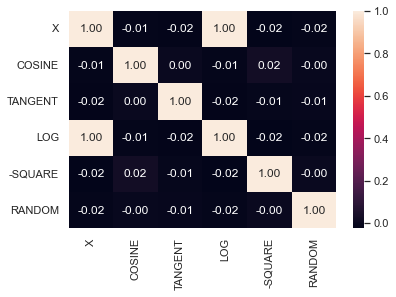


 Chatterjee Correlations


,X,COSINE,TANGENT,LOG,-SQUARE,RANDOM
X,1.000000,-0.002876,0.000933,0.994476,0.266039,-0.000553
COSINE,0.990502,1.000000,0.192679,0.845082,0.704205,-0.010408
TANGENT,0.981260,0.321177,1.000000,0.719223,0.412048,0.060420
LOG,0.999655,-0.002826,0.001034,1.000000,0.266283,-0.000468
-SQUARE,0.999323,-0.000355,0.006558,0.989628,1.000000,0.006281
RANDOM,-0.004932,0.011958,-0.010176,0.003690,-0.000495,1.000000


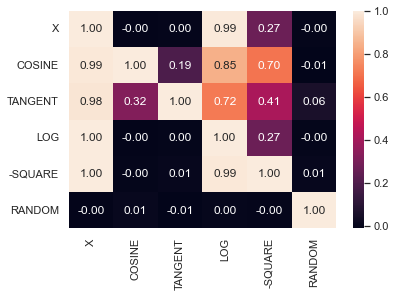

In [4]:
# correlation table and heatmap

dict_of_Ys['X'] = X
noisy_dict_of_Ys['X'] = X

# for noisless version
df_vars = pd.DataFrame(dict_of_Ys)

# for noisy version
# df_vars = pd.DataFrame(noisy_dict_of_Ys)

# X first (kinda headache o a code, looking for better ideas)
df_vars = df_vars[['X'] + df_vars.columns.tolist()[:-1]]

# Spearman corr table and heatmap
print('Spearman Correlations')

display(df_vars.corr(method='spearman'))

sns.set(rc={'figure.figsize':(6, 4)})
sns.heatmap(df_vars.corr(method='spearman'), annot=True, fmt=".2f")
plt.show()

# chatterjee corr table and heatmap
print('\n Chatterjee Correlations')

df_corr_chatt = chatt_table(df_vars)
display(df_corr_chatt)

sns.set(rc={'figure.figsize':(6, 4)})
sns.heatmap(df_corr_chatt, annot=True, fmt=".2f")
plt.show()
